# Tarea 1

**Envío del PR inicial: 24.08.2018** 

**Aceptación del PR: 02.09.2018** 

## 1

- Escriban una función `newton` que, a partir de `f`, `fprime` y `x0` dados, obtenga una de las raices de la ecuación. Comprueben que funciona con $f(x)=x^2 -2$ y $f'(x) = 2x$. Tengan suficiente cuidado para que no haya ningún tipo de inestabilidad de tipo en su función.

- Documenta la función de manera adecuada (*docstrings*).

- ¿Cómo se comporta, en términos del número de iterados, la convergencia del método de Newton?

In [2]:
#Pkg.add("Plots")
using Plots

In [3]:
"Encuentra una raíz de la función f mediante el método de newton, dados además la derivada de f (fprime) y un valor inicial x0."
function newton(f,fprime,x0)
    xn=x0
    for i in 1:100
        xn=xn-f(xn)/fprime(xn)
    end
    return xn
end

newton

In [4]:
f(x)=x^2-2
fprima(x)=2*x
fcero(x)=0
newton(f,fprima,.125)


1.4142135623730951

In [218]:
"Encuentra una raíz de la función f mediante el método de newton, dados además la derivada de f (fprime), un valor inicial x0 y un número de iteraciones a realizar."
function newton_iteraciones(f,fprime,x0,iteraciones::Int)
    xn=x0
    for i in 1:iteraciones
        xn=xn-f(xn)/fprime(xn)
    end
    return xn
end

newton_iteraciones

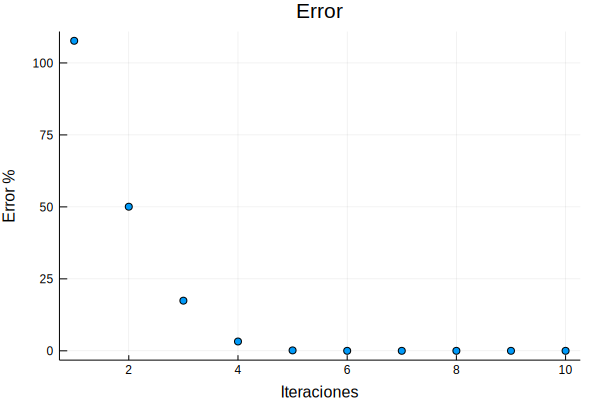

In [196]:
N=1:1:10
resultados=[]
g(x)=x^3-6*x^2+11*x-6
gprima(x)=3*x^2-12*x+11
for i in N
    push!(resultados,newton_iteraciones(g,gprima,-1,i))
end
error=abs.(resultados.-1).*100
scatter(N,error,title="Error",xaxis="Iteraciones",yaxis="Error %",legend=false)

La gráfica se realizó para la función $f(x)=x^2-2$, donde podemos notar que el error decae exponencialmente con el número de iteraciones, por lo que se podría inferir que el método de newton es bastante exacto y eficiente al no requerir tantas iteraciones para dar un resultado preciso.

## 2

- Usando la función que hicieron en el ejercicio anterior y variando la condición inicial `x0`, de -3 a 3 con pasos suficientemente pequeños, por ejemplo `0.125`, grafiquen la dependencia de la raíz encontrada de la condición inicial para $f(x)=x^2-2$. Para hacer esto, vale la pena que guarden en un vector la raíz obtenida y en otro la condición inicial.

- Repitan el inciso anterior para $g(x) = (x-1)(x-2)(x-3)$, considerando el intervalo $x_0\in[1,3]$ y muchas condiciones iniciales.

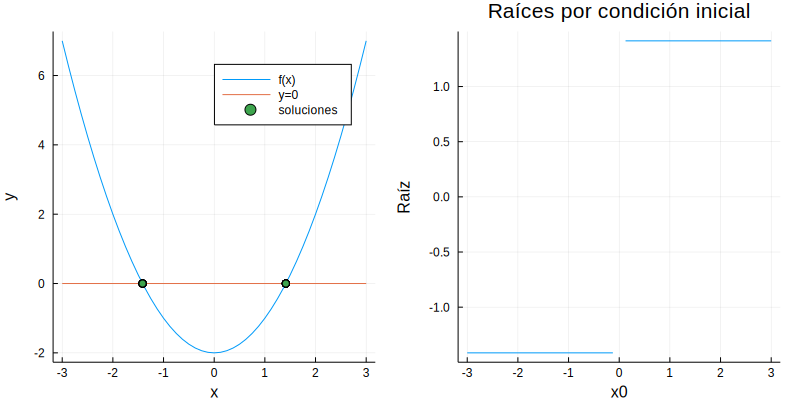

In [288]:
x0=-3.0:0.125:3
"Encuentra y grafica las raíces de una función f, con la derivada de f (fprime) dada, en un intervalo x0."
function soluciones(f,fprime,x0)
    raiz=[]
    for i in x0
        push!(raiz,newton(f,fprime,i))
    end
    p1=plot(x0,f.(x0),label="f(x)",xaxis="x",yaxis="y")
    p1=plot!(x0,fcero.(x0),label="y=0")
    p1=scatter!(raiz,fcero.(x0),label="soluciones")
    p2=plot(x0,raiz,title="Raíces por condición inicial",legend=false,xaxis="x0",yaxis="Raíz")
    plot(p1,p2,size=(800,400))
end
soluciones(f,fprime,x0)

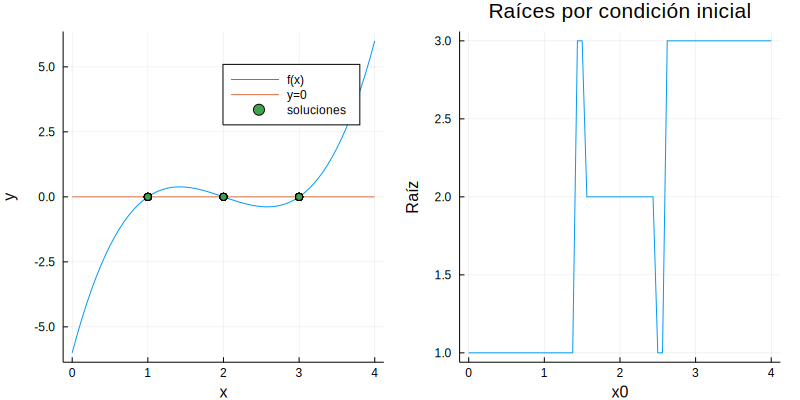

In [225]:
g(x)=x^3-6*x^2+11*x-6
gprima(x)=3*x^2-12*x+11
x0=0:0.0625:4
soluciones(g,gprima,x0)

## 3

Considerando la función $h(z)=z^3-c$, con $z\in\mathbb{C}$ y $c=1$, utiliza el método de Newton para encontrar las raices en el plano complejo de dicha ecuación. Repite el ejercicio de la dependencia de la raíz encontrada de las condiciones iniciales, graficando en el plano de Argand.

In [144]:
x0=-3.0:0.0625:3
y0=-3.0:0.0625:3
h(x)=x^3-1+0
hprima(x)=3*x^2+0
"""
Encuentra las raíces complejas de una función, graficándola con sus raíces reales.
Además, realiza una gráfia del mapeo de las condiciones iniciales a la raíz que encuentran.
"""
function soluciones_complejas(f,fprima,x0,y0)
    raiz=[]
    conjunto=[]
    raices=[]
    origenes=[]
    colores=["red","blue","green","yellow"]
    raizreal=[]
    for i in x0
        for j in y0
            r=newton(f,fprima,i+j*im)
            push!(raiz,r)
            push!(conjunto,i+j*im)
        end
    end
    push!(raices,raiz[1])
    for i in 1:size(raiz,1)-1
        if abs(raiz[i]-raiz[i+1])>1e-6
            a=true
            b=true
            for j in raices
                if abs(raiz[i+1]-j)>1e-6
                    a=true
                else
                    a=false
                b=(a & b)
                end
            end
            if b==true
                push!(raices,raiz[i+1])
            end
        end
    end
    for j in 1:size(raices,1)
        push!(origenes,[])
    end
    for i in 1:size(conjunto,1)
        for j in 1:size(raices,1)
            if abs(raiz[i]-raices[j])<1e-6
                push!(origenes[j],conjunto[i])
            end
        end
    end
    for i in raices
        if abs2(imag(i))<1e-6
            push!(raizreal,i)
        end
    end
    p2=plot()
    for i in 1:size(raices,1)
        p2=scatter!(real.(origenes[i]),imag.(origenes[i]),color=colores[i],label="z0="*string(raices[i]))
    end
    p2=scatter!(real.(raices),imag.(raices),m=(8),xaxis="Eje Real",yaxis="Eje Imaginario",label="Soluciones")
    p1=plot(x0,f.(x0),label="f(x)",xaxis="x",yaxis="y")
    p1=plot!(x0,fcero.(x0),label="y=0")
    p1=scatter!(real.(raizreal),fcero.(raizreal),label="raíces")
    #p2=scatter!(real.(raices),imag.(raices))
    plot(p1,p2,size=(900,450))
end
soluciones_complejas(h,hprima,x0,y0)

## 4

- Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ de una variable (a priori arbitaria), en un punto $x_0$. Para esto, utilizaremos la aproximación de la derivada
que se basa en su definición:

$$ 
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} \equiv \frac{f(x_0+h)-f(x_0)}{h},
$$

lo que requiere de la especificación de `h`. (Este método también se conoce por el nombre de *diferencias finitas*.)

- A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico respecto al valor *exacto*. Ilustren esto en una gráfica del error vs $h$, para $f(x) = 3x^3-2$, en $x_0=1$. 

In [186]:
"Encuentra el valor numérico de la diferencia de una función f entre los puntos x0+h y x0, dividido entre el valor de h"
function derivada_derecha(f,h,x0)
    fprima=(f(x0+h)-f(x0))/h
    return fprima
end

derivada_derecha (generic function with 1 method)

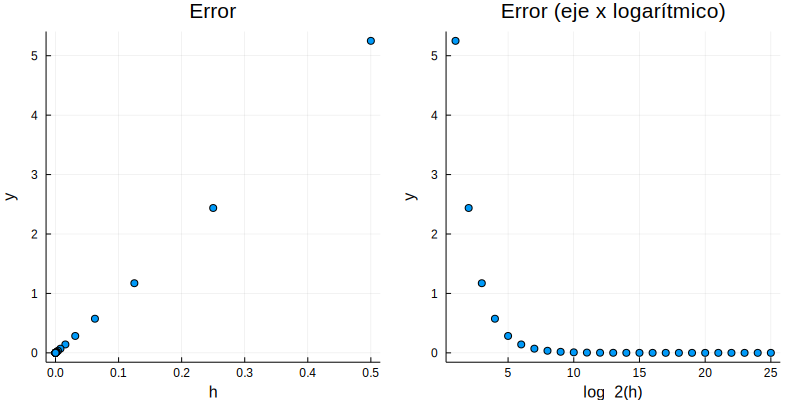

In [266]:
f1(x)=3*x^3-2
"Grafica los errores respecto a n diferencias finitas con h=0.5^i de una función f, en x0, conociendo el valor real de la derivada"
function errores_derivada(f,x0,n,valor)
    deri=[]
    err=[]
    hh=[]
    for i in 1:n
        h=0.5^i
        push!(err,derivada_derecha(f1,h,1)-valor)
        push!(hh,h)
    end
    p1=scatter(hh,err,legend=false, title="Error", xaxis="h",yaxis="y")
    p2=scatter(1:n,err,legend=false, title="Error (eje x logarítmico)", xaxis="log_2(h)", yaxis="y")
    plot(p1, p2, size=(800,400))
end
errores_derivada(f1,1,25,9)

## 5

- Repitan el ejercicio anterior (escribe una función `derivada_simetrica`, usando ahora la aproximación *simétrica* (respecto a la ocurrencia de $h$) de la derivada, dada por

$$
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
$$

- ¿Por qué es correcto afirmar que la derivada simétrica resulta en una mejor aproximación que la derivada derecha? Argumenten y si es necesario usen argumentos analíticos.

In [265]:
"Encuentra el promedio de las diferencias finitas de f en x0 dado h por la izquierda y por la derecha"
function derivada_simetrica(f,h,x0)
    fprima=(f(x0+h)-f(x0-h))/(2*h)
    return fprima
end

derivada_simetrica

In [189]:
derivada_simetrica(f1,0.5^10,1)

9.00000286102295

La derivada simétrica es una mejor aproximación de la derivada, pues es el promedio de la diferencia finita por la izquierda y por la derecha, es decir:
$$
f'(x_0) \approx \frac{1}{2}\left(\frac{\Delta f_+}{h} + \frac{\Delta f_-}{h}\right)=\lim_{h\to 0} \frac{1}{2}\left(\frac{f(x_0+h)-f(x)}{h} + \frac{f(x)-f(x_0-h)}{h}\right)=\lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}
$$

## 6

- Definan la función `derivada_compleja` considerando la definición de la derivada dada por:
$$
f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big),
$$
donde $\Im$ indica la parte imaginaria del argumento ($i=\sqrt{-1}$). 

- Argumenta (analíticamente) por qué esta definición da tan buen resultado. ¿Hay algún caso en que esta definición puede dar resultados inesperados?

In [267]:
"Obtiene la diferencia finita de la parte imaginaria de una función compleja respecto a la parte imaginaria de su argumento en x_0"
function derivada_compleja(f,h,x0)
    fprima=imag(f(x0+h*im)-f(x0))/h
    return fprima
end

derivada_compleja

In [273]:
f(x)=x+(x*im)^2*im
derivada_compleja(f,0.00001,2+2im)

5.000010000033583

Esta definición es buena pero sólo da una parte de la derivada: la proyección imaginaria de la derivada con respecto a la parte imaginaria de la variable de la función $f(z)$; es decir:


sea $z=x+iy \Rightarrow f(z)=f(x,y)=u(x,y)+iv(x,y)$


$$
\Im \left(\frac{f(z_0 + ih)-f(z_0)}{h}\right)=\frac{\Im f(z_0 + ih)-f(z_0)}{h}=\frac{v(x_0,y_0+h)-v(x_0,y_0)}{h}
$$
$
\Rightarrow
$
$$
\lim_{h\to 0}\frac{v(x_0,y_0+h)-v(x_0,y_0)}{h}=\frac{\partial v}{\partial y}
$$